# TensorFlow y Redes Neuronales

#### **Importación de librerias:**

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns 
from sklearn.metrics import confusion_matrix

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

%matplotlib inline

#### **Definición de parámetros:**

In [2]:
feature_vector_length = 784
num_classes = 10

#### **Lectura de los datos:**

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


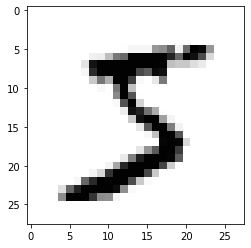

In [4]:
digito1 = X_train[0]
# visualizando el primer digito
plt.imshow(digito1, cmap = cm.Greys)
plt.show()

#### **Verificación de clases balanceadas**

In [5]:
unique_train, counts_train = np.unique(Y_train, return_counts=True)
print("Nº de registros por cada una de las clases posibles de train: ")
print(dict(zip(unique_train, counts_train)))

unique_test, counts_test = np.unique(Y_test, return_counts=True)
print("Nº de registros por cada una de las clases posibles de test: ")
print(dict(zip(unique_test, counts_test)))

Nº de registros por cada una de las clases posibles de train: 
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Nº de registros por cada una de las clases posibles de test: 
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


#### **Tratamiento de los datos:**

Ahora mismo, los datos de entrada son matrices de 28 x 28 que debemos transformar en vectores de 784 variables:

In [6]:
print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

print(X_train.shape)

(60000, 28, 28)
(60000, 784)


Como hemos visto en el ejercicio anterior, cada una de las imágenes se representa con valores de la intensidad. Estos valores están comprendidos en el rango de 0 a 255. En las redes neuronales, necesitamos "normalizar" los datos. Una forma de normalizar los datos es dividir por el valor máximo posible (255).

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Transformando cada clase de las etiquetas en un vector $10d$


In [8]:
Y_test_classes = Y_test

print(Y_train[0])
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# Indicando como vamos a introducir el formato de los registros.
input_shape = (feature_vector_length,)
print(f'Formato de los registros: {input_shape}')


Formato de los registros: (784,)


#### **Configuración del modelo:**

In [10]:
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 350)               274750    
_________________________________________________________________
dense_10 (Dense)             (None, 50)                17550     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 292,810
Trainable params: 292,810
Non-trainable params: 0
_________________________________________________________________
None


Necesitamos tener una capa de entrada con la forma de los datos y una capa de salida con la forma de las clases, y dos capas ocultas que intentan averiguar los roles entre ellas.

* *Sequential*: Define una secuencia de capas. Al incorporar decimos que la construcción de la red neuronal será por capas y de forma secuencial.
* *Dense*: esta es la palabra clave para agregar otra capa de neuronas
función de activación: Relu es la mejor función de activación. Sin embargo, esto debe seleccionarse, según el caso de uso.
* *Relu*: es una función de activación, y "Si X> 0 devuelve X, de lo contrario devuelve 0", por lo que solo pasa valores, iguales a cero o superiores a cero, a la siguiente capa de la red.
* *Softmax*: recibe un conjunto de valores, elige el mayor valor de probabilidad, lo convierte en [0,0,0,0,1,0,0,0,0,0], y esta ilustración en particular significa que la imagen de entrada está clasificada en la clase "dígito 5".



#### **Configuración del modelo:**

Ahora podemos compilar el modelo tratando de minimizar la [entropía cruzada](https://es.wikipedia.org/wiki/Entrop%C3%ADa_cruzada) utilizando el algoritmo [Adam](http://arxiv.org/abs/1412.6980) que es un método de [optimización estocástica](https://en.wikipedia.org/wiki/Stochastic_optimization). También se define cual es la métrica por la que el modelo debe evaluar y ajustarse lo mejor posible.


In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#### **Entrenamiento del modelo:**

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 3s 12ms/step - loss: 0.7233 - accuracy: 0.7999 - val_loss: 0.1771 - val_accuracy: 0.9514
Epoch 2/10
192/192 [==============================] - 2s 12ms/step - loss: 0.1610 - accuracy: 0.9528 - val_loss: 0.1213 - val_accuracy: 0.9648
Epoch 3/10
192/192 [==============================] - 2s 12ms/step - loss: 0.1018 - accuracy: 0.9707 - val_loss: 0.1023 - val_accuracy: 0.9692
Epoch 4/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0741 - accuracy: 0.9779 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 5/10
192/192 [==============================] - 2s 11ms/step - loss: 0.0548 - accuracy: 0.9842 - val_loss: 0.0843 - val_accuracy: 0.9752
Epoch 6/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0854 - val_accuracy: 0.9730
Epoch 7/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0316 - accuracy: 0.9910 - val_loss: 0.0861 - val_accuracy: 0.9752

Para el entrenamiento del modelo, le pasamos los datos de entrenamiento junto con las etiquetas. Entrenaremos hasta alcanzar 10 épocas, con paquetes de 250 en 250 muestras y reajustará los pesos del modelo con el 20% de los datos de cada época.

El parámetro *verbose* al indicar 1, proporciona información de cómo va evolucionando la precisión del modelo a lo largo de cada iteración.

#### **Predicción del modelo**



In [ ]:

test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Resultados de test: - Perdida: {test_results[0]} - Precisión: {test_results[1]}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9783
Resultados de test: - Perdida: 0.07535095512866974 - Precisión: 0.9782999753952026%


In [ ]:
# test_pred = model.predict(X_test)
test_pred = model.predict_classes(X_test)
test_pred[0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


7

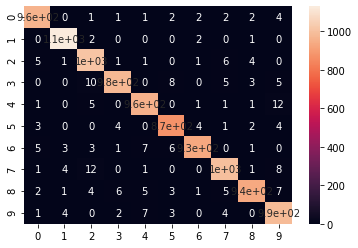

In [ ]:

cf_matrix = confusion_matrix (Y_test_classes, test_pred) 
sns.heatmap (cf_matrix, annot = True)